In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [2]:
# read the raw csv files into dataframes
train = pd.read_csv("./train.csv", dtype={"StateHoliday": "str"})
test = pd.read_csv("./test.csv")
store = pd.read_csv("./store.csv")

In [75]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [3]:
# Combine train with store and test with store
train_store = train.merge(store, on='Store', how='left')
test_store = test.merge(store, on='Store', how='left')

train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31/07/2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31/07/2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31/07/2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31/07/2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
# check columns and their data types
train_store.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [5]:
# checking effect of store being closed on sales

train_store_close = train_store[train_store.Open == 0]
print("Sales are always 0 when store is closed? [True/False] : ",train_store_close.shape == train_store_close[train_store_close.Sales == 0].shape)

Sales are always 0 when store is closed? [True/False] :  True


In [6]:
# splitting train and test data into two dataframes, based on Open = 0 or 1

# seperating out values when store is open, since if store is closed sales=0, irrespective of the other features
# we can hard code sales = 0 in test, when store is closed, therefore those entries can be removed when modelling
train_store_open = train_store[train_store.Open == 1]
train_store_close = train_store[train_store.Open == 0]
train_store_open = train_store_open.drop(columns=['Open'], axis=1)

# splitting test data into 2 parts too
test_store_open = test_store[test_store.Open == 1]
test_store_open = test_store_open.drop(columns=['Open'], axis=1)
test_store_close = test_store[test_store.Open == 0]

# Pre-Processing data

In [7]:
# sort train data according to date, since it is time series data
train_store_open = train_store_open.sort_values(['Date'],  ascending = True)

In [8]:
# for train data
# the count of missing values
missing_entry_count = train_store_open.isnull().sum()
# total values
total_entry_count = train_store_open.isnull().count() 
# the percentage of missing values
missing_entry_percentage = round(missing_entry_count/total_entry_count *100, 2) 
pd.DataFrame({'missing entries count': missing_entry_count, 'percentage of entries missing': missing_entry_percentage})

,missing entries count,percentage of entries missing
Store,0,0.00
DayOfWeek,0,0.00
Date,0,0.00
Sales,0,0.00
Customers,0,0.00
Promo,0,0.00
StateHoliday,0,0.00
SchoolHoliday,0,0.00
StoreType,0,0.00
Assortment,0,0.00


In [9]:
# for test data
# the count of missing values
missing_entry_count = train_store_open.isnull().sum()
# total values
total_entry_count = train_store_open.isnull().count() 
# the percentage of missing values
missing_entry_percentage = round(missing_entry_count/total_entry_count *100, 2) 
pd.DataFrame({'missing entries count': missing_entry_count, 'percentage of entries missing': missing_entry_percentage})

,missing entries count,percentage of entries missing
Store,0,0.00
DayOfWeek,0,0.00
Date,0,0.00
Sales,0,0.00
Customers,0,0.00
Promo,0,0.00
StateHoliday,0,0.00
SchoolHoliday,0,0.00
StoreType,0,0.00
Assortment,0,0.00


In [10]:
# handling missing data in the two datasets

def handle_missing_values(df):
    # for competition distance
    # replace na values with mean
    df['CompetitionDistance'].fillna(df.CompetitionDistance.mean(), inplace=True)

    # for competition open since month and year
    # replace na values with 0
    df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
    df['CompetitionOpenSinceYear'].fillna(0, inplace=True)

    # for promo2 related columns
    # If there is no promotion 2, then the corresponding columns should have zero values.
    df.loc[df.Promo2 == 0, 'PromoInterval'] = df.loc[df.Promo2 == 0, 'PromoInterval'].fillna(0)
    df.loc[df.Promo2 == 0, 'Promo2SinceWeek'] = df.loc[df.Promo2 == 0, 'Promo2SinceWeek'].fillna(0)
    df.loc[df.Promo2 == 0, 'Promo2SinceYear'] = df.loc[df.Promo2 == 0, 'Promo2SinceYear'].fillna(0)
    
    return df


def feature_engineering(df):
    # split date into day, month and year
    df.loc[:,'Year'] = pd.DatetimeIndex(df.Date).year
    df.loc[:,'Month'] = pd.DatetimeIndex(df.Date).month
    df.loc[:,'Day'] = pd.DatetimeIndex(df.Date).day
    df.loc[:,'WeekOfYear'] = pd.DatetimeIndex(df.Date).weekofyear

    # competition related new feature
    competition_since_date = df.apply(
        lambda x: x['Date'] if x['CompetitionOpenSinceYear'] == 0 or x['CompetitionOpenSinceMonth'] == 0 
        else dt.datetime( year = x['CompetitionOpenSinceYear'], month = x['CompetitionOpenSinceMonth'], day=1 ), axis = 1)
    df['CompetitionDurationInMonth'] = ((df['Date'] - competition_since_date)/30).apply(lambda x: x.days).astype('int64')

    # promo related new features
    promo_since = df.apply(
        lambda x: x['Date'] if x['Promo2SinceYear'] == 0 or x['Promo2SinceWeek'] == 0 
        else dt.date.fromisocalendar(x['Promo2SinceYear'], x['Promo2SinceWeek'], 1), axis = 1)
    df['PromoDurationInWeek'] = ((df['Date'] - promo_since )/7).apply(lambda x: x.days).astype('int64')

    monthToNumberMap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    df['MonthMap'] = df['Date'].dt.month.map(monthToNumberMap)
    df['IsPromo2Month'] = df[['PromoInterval', 'MonthMap']].apply(
        lambda x: 0 if x['PromoInterval'] == 0 else 1 if x['MonthMap'] in x['PromoInterval'].split(',') else 0, axis = 1)
    df.drop( ['MonthMap'], axis=1, inplace=True )
    
    return df

In [11]:
train_store_open = handle_missing_values(train_store_open)
test_store_open = handle_missing_values(test_store_open)

# checking if all na values fixed
print("For training data:\n")
print(train_store_open.isnull().sum(), "\n")
print("For testing data:\n")
print(test_store_open.isnull().sum())

For training data:

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64 

For testing data:

Store                            0
DayOfWeek                        0
Date                             0
Sales                        35093
Customers                    35093
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth        0

In [12]:
# change datatype of features

train_store_open = train_store_open.astype({'CompetitionOpenSinceMonth':'int64', 'CompetitionOpenSinceYear':'int64', 'Promo2SinceWeek':'int64', 'Promo2SinceYear':'int64' })
train_store_open['Date'] = pd.to_datetime( train_store_open[ 'Date' ] )
print("Train:\n")
print(train_store_open.dtypes)

test_store_open = test_store_open.astype({'CompetitionOpenSinceMonth':'int64', 'CompetitionOpenSinceYear':'int64', 'Promo2SinceWeek':'int64', 'Promo2SinceYear':'int64' })
test_store_open['Date'] = pd.to_datetime( test_store_open[ 'Date' ] )
print("\nTest:\n")
print(test_store_open.dtypes)

Train:

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

Test:

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                               float64
Customers                           float64
Pr

In [13]:
# creating new features
test_store_open = feature_engineering(test_store_open)
train_store_open = feature_engineering(train_store_open)

C:\Users\Ananya\AppData\Local\Temp/ipykernel_25356/2579588879.py:27: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df.loc[:,'WeekOfYear'] = pd.DatetimeIndex(df.Date).weekofyear


In [14]:
# filtering rows where sales = 0

train_store_open_0_sales = train_store_open[train_store_open.Sales == 0]
print("Total number of records where store is open and sales are zero = ", train_store_open_0_sales.shape[0])

train_store_open_sales_gt_0 = train_store_open[train_store_open.Sales > 0]
print("Total number of records where store is open and sales are not zero = ", train_store_open_sales_gt_0.shape[0])

train_store_open_0_sales_0_customers = train_store_open_0_sales[train_store_open_0_sales.Customers==0]
print("Out of the", train_store_open_0_sales.shape[0], "records where sales is zero,", train_store_open_0_sales_0_customers.Store.value_counts().count(), "of them have zero customers")

Total number of records where store is open and sales are zero =  54
Total number of records where store is open and sales are not zero =  844338
Out of the 54 records where sales is zero, 40 of them have zero customers


In [15]:
# filtering features

# drop customers column, since we do not have that value available in test
train_store_open_sales_gt_0 = train_store_open_sales_gt_0.drop(columns=['Customers'], axis=1)
test_store_open.drop(columns=["Customers"], inplace=True)

# EDA

In [16]:
# check summary statistics of data for numerical features
train_store_open_sales_gt_0.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,844338.0,558.421374,321.730861,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844338.0,3.520350,1.723712,1.0,2.0,3.0,5.0,7.0
Sales,844338.0,6955.959134,3103.815515,46.0,4859.0,6369.0,8360.0,41551.0
Promo,844338.0,0.446356,0.497114,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,844338.0,0.193578,0.395102,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,844338.0,5458.156169,7799.457083,20.0,710.0,2330.0,6880.0,75860.0
CompetitionOpenSinceMonth,844338.0,4.926482,4.283634,0.0,0.0,4.0,9.0,12.0
CompetitionOpenSinceYear,844338.0,1369.692738,935.556484,0.0,0.0,2006.0,2011.0,2015.0
Promo2,844338.0,0.498670,0.499999,0.0,0.0,0.0,1.0,1.0
Promo2SinceWeek,844338.0,11.596159,15.308101,0.0,0.0,0.0,22.0,50.0


In [17]:
# check unique values of categorical features
train_store_open_sales_gt_0.select_dtypes( include = 'object').apply( lambda x: x.unique().shape[0])

StateHoliday     4
StoreType        4
Assortment       3
PromoInterval    4
dtype: int64

In [18]:
# check if there is any duplicated data
train_store_open_sales_gt_0[train_store_open_sales_gt_0.duplicated() == True].shape[0]

0

## - Univariate Analysis

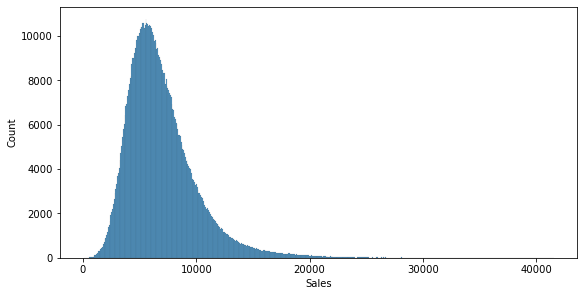

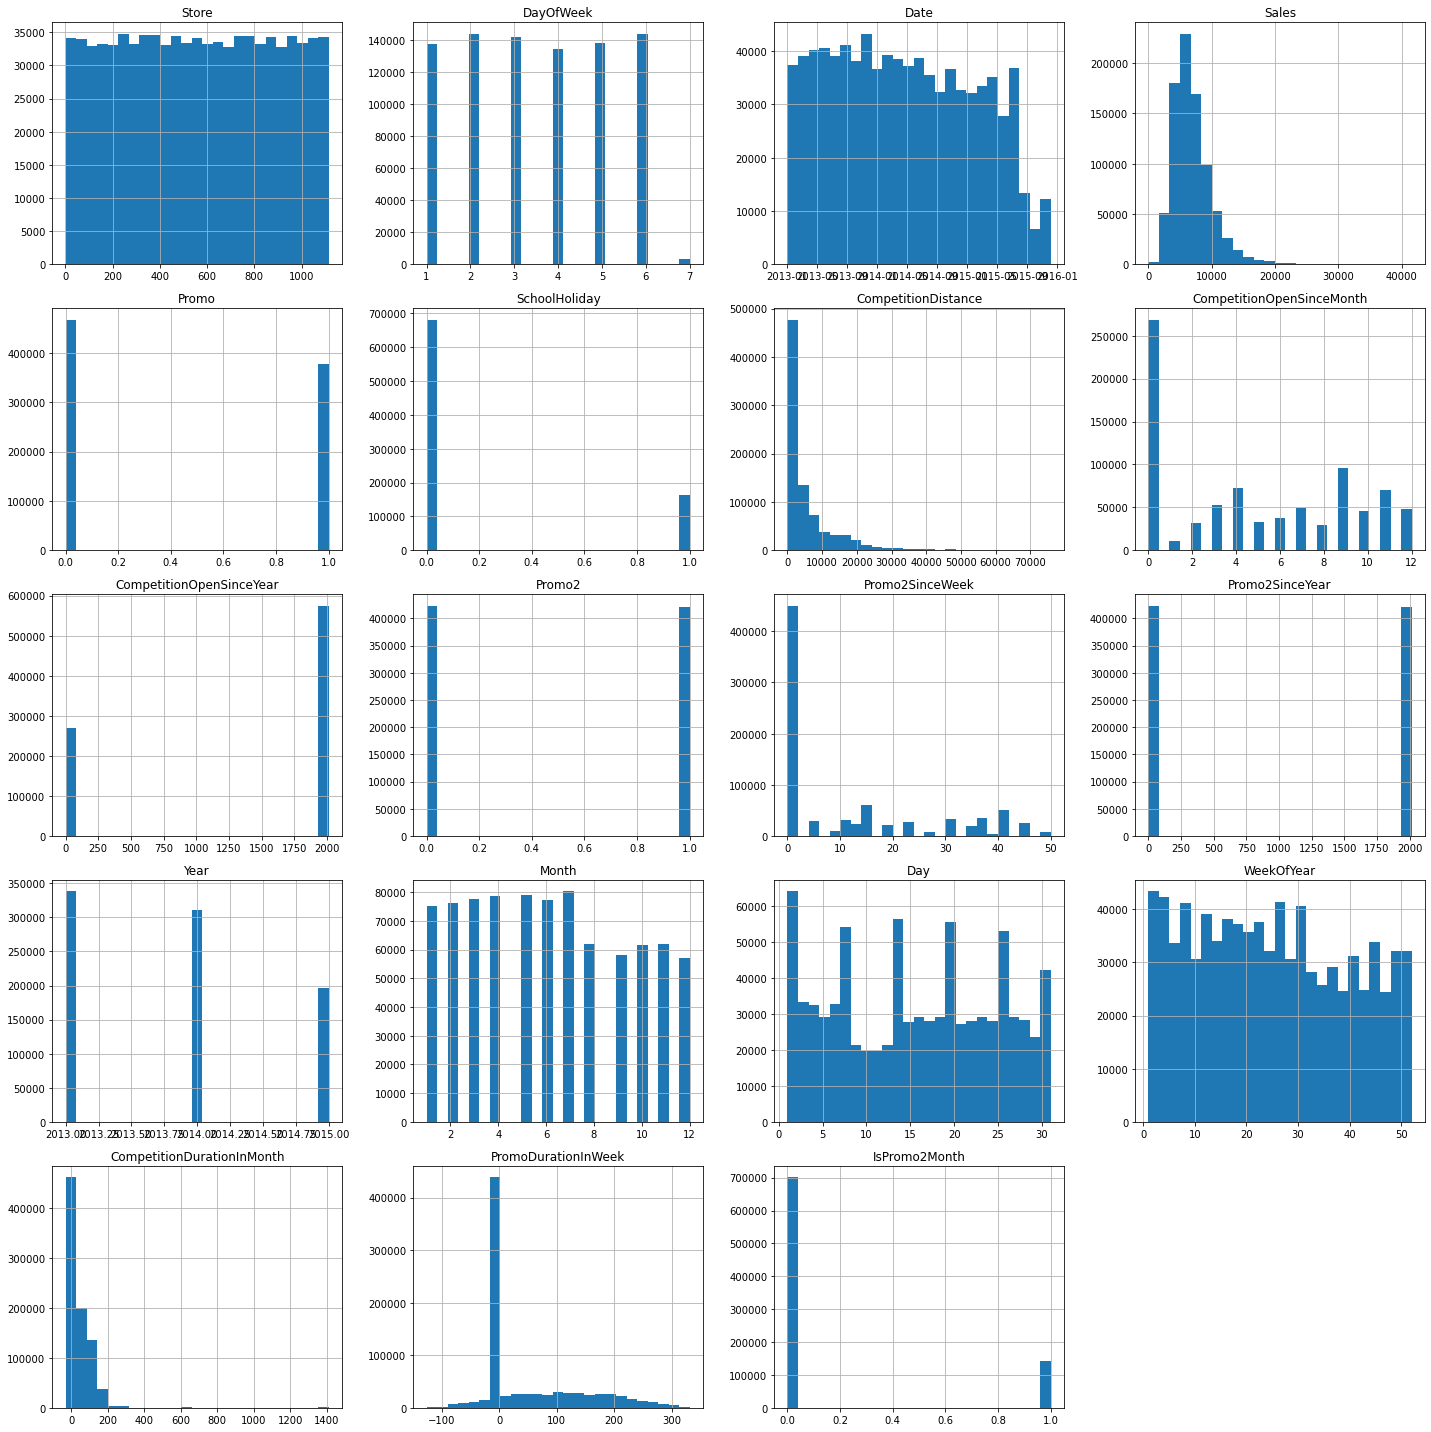

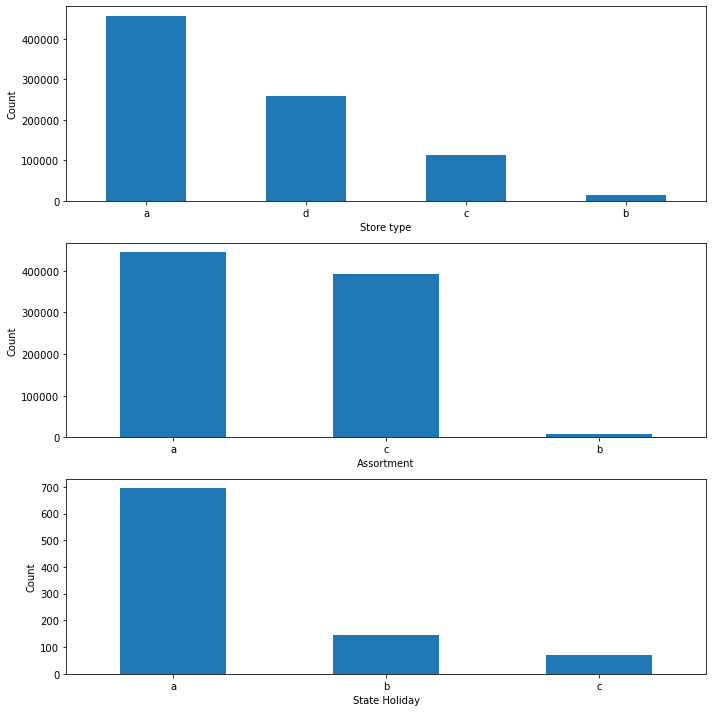

In [19]:
# 1) Sales (Target Variable)

fig = plt.figure( figsize = (8, 4), constrained_layout=True)
sb.histplot(train_store_open_sales_gt_0['Sales'], kde = False)
plt.show()


# 2) Numerical variables

ax = train_store_open_sales_gt_0.hist(bins = 25, figsize = (20,20))
plt.tight_layout()
plt.show()


# 3) Categorical variables

plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
train_store_open_sales_gt_0['StoreType'].value_counts().plot.bar(rot=0)
plt.xlabel("Store type")
plt.ylabel("Count")

plt.subplot(3, 1, 2)
train_store_open_sales_gt_0['Assortment'].value_counts().plot.bar(rot=0)
plt.xlabel("Assortment")
plt.ylabel("Count")

plt.subplot(3, 1, 3)
train_store_open_sales_gt_0[train_store_open_sales_gt_0['StateHoliday'] != '0']['StateHoliday'].value_counts().plot.bar(rot=0)
plt.xlabel("State Holiday")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

## - Bivariate Analysis

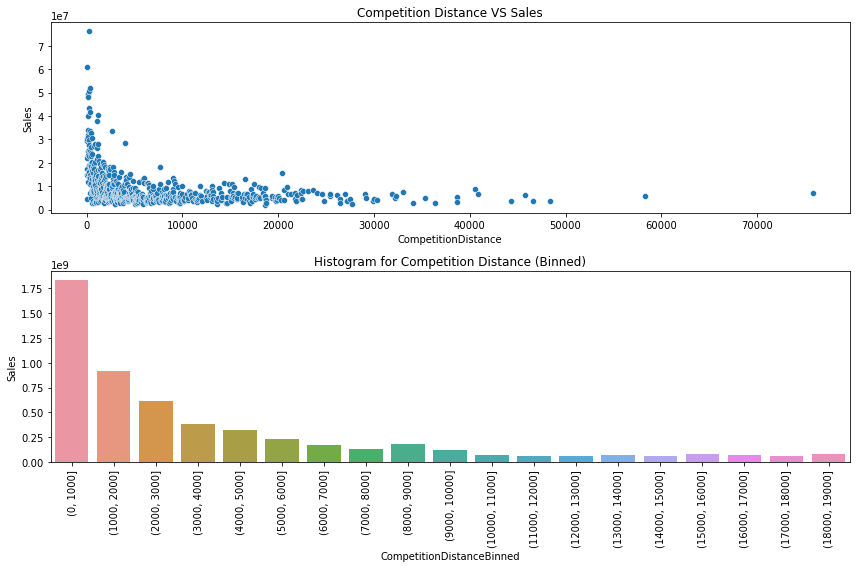

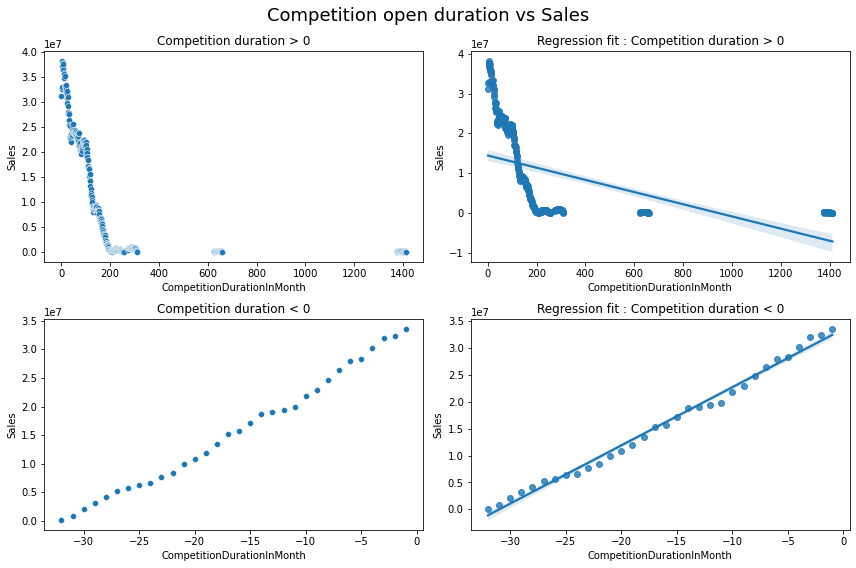

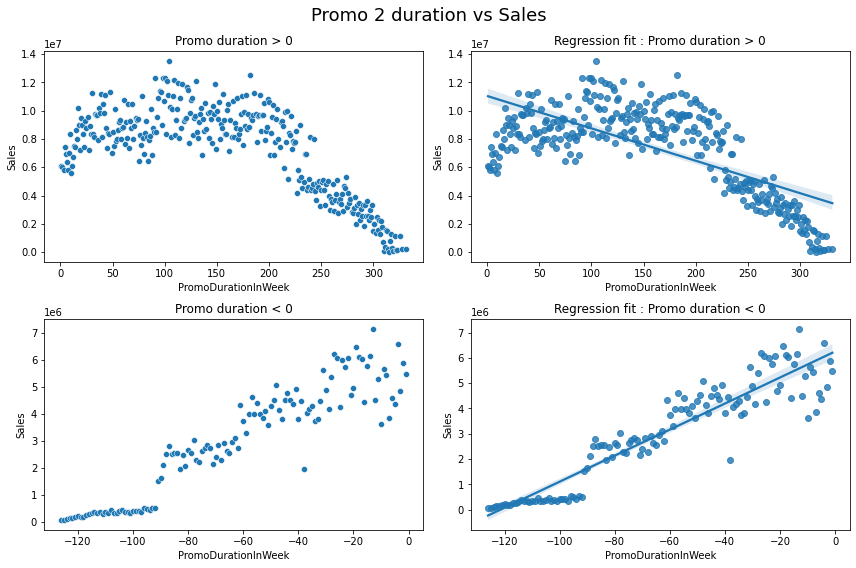

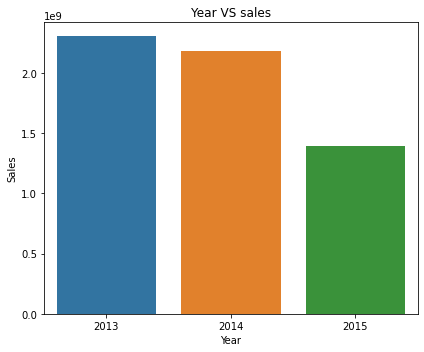

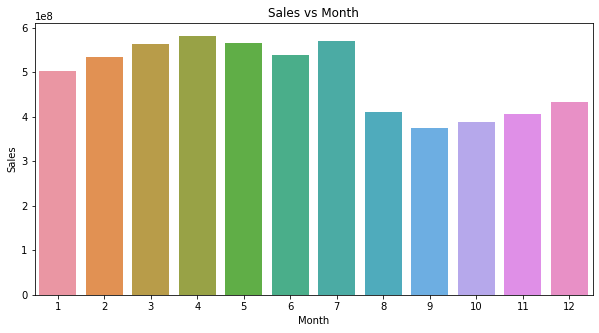

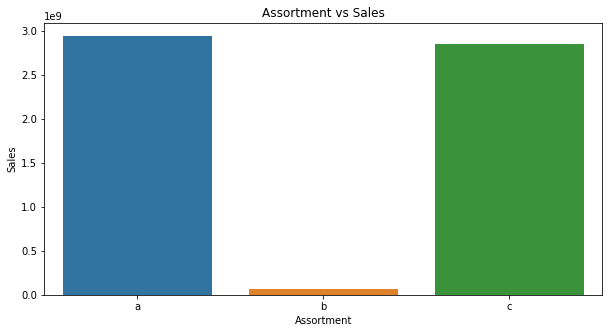

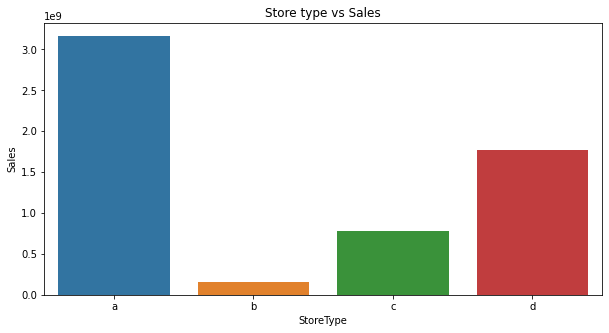

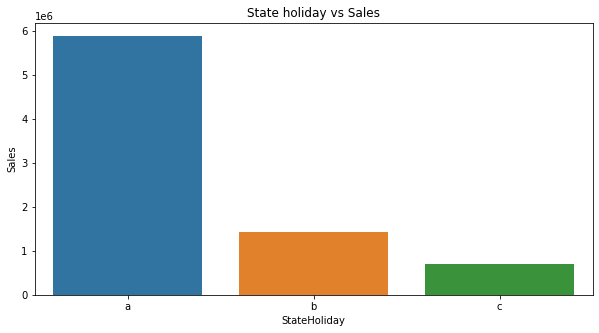

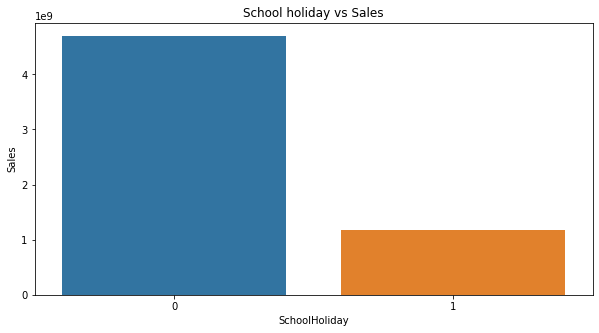

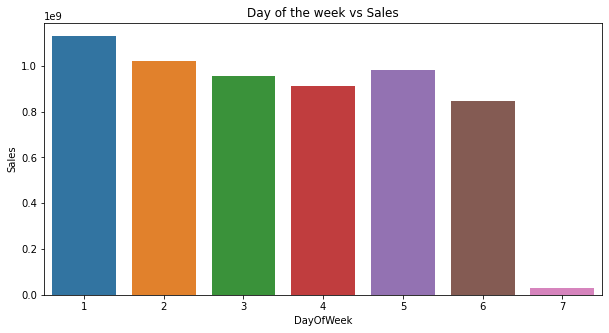

In [20]:
# 1) Competition Distance vs Sales

plt.figure(figsize= (12,8))
aux1 = train_store_open_sales_gt_0[['CompetitionDistance', 'Sales']].groupby('CompetitionDistance').sum().reset_index()
plt.subplot(2, 1, 1).set_title("Competition Distance VS Sales")
sb.scatterplot(x= 'CompetitionDistance', y= 'Sales', data= aux1);

plt.subplot(2, 1, 2).set_title("Histogram for Competition Distance (Binned)")
bins = list(np.arange( 0, 20000, 1000))
aux1['CompetitionDistanceBinned'] = pd.cut(aux1['CompetitionDistance'], bins = bins)
aux2 = aux1[['CompetitionDistanceBinned', 'Sales']].groupby('CompetitionDistanceBinned').sum().reset_index()
plt.xticks(rotation = 90)
sb.barplot( x= 'CompetitionDistanceBinned', y= 'Sales', data = aux2);
plt.tight_layout()
plt.show()


# 2) Competition open duration in weeks vs Sales

plt.figure(figsize= (12,8))
plt.suptitle("Competition open duration vs Sales", fontsize=(18))
aux = train_store_open_sales_gt_0[['CompetitionDurationInMonth', 'Sales']].groupby('CompetitionDurationInMonth').sum().reset_index()
plt.subplot(2,2,1).set_title("Competition duration > 0")
data1 = aux[aux['CompetitionDurationInMonth'] > 0]
sb.scatterplot(x = 'CompetitionDurationInMonth', y = 'Sales', data = data1)
plt.subplot(2,2,2).set_title("Regression fit : Competition duration > 0")
sb.regplot(data = data1, x= 'CompetitionDurationInMonth', y= 'Sales');
plt.subplot(2,2,3).set_title("Competition duration < 0")
data2 = aux[aux['CompetitionDurationInMonth'] < 0]
sb.scatterplot(x = 'CompetitionDurationInMonth', y = 'Sales', data = data2)
plt.subplot(2,2,4).set_title("Regression fit : Competition duration < 0")
sb.regplot(data = data2, x= 'CompetitionDurationInMonth', y= 'Sales');

plt.tight_layout()
plt.show()


# 3) Promo 2 duration in weeks vs Sales

plt.figure(figsize= (12,8))
plt.suptitle("Promo 2 duration vs Sales", fontsize=(18))
aux = train_store_open_sales_gt_0[['PromoDurationInWeek', 'Sales']].groupby('PromoDurationInWeek').sum().reset_index()
plt.subplot(2,2,1).set_title("Promo duration > 0")
data1 = aux[aux['PromoDurationInWeek'] > 0]
sb.scatterplot(x = 'PromoDurationInWeek', y = 'Sales', data = data1)
plt.subplot(2,2,2).set_title("Regression fit : Promo duration > 0")
sb.regplot(data = data1, x= 'PromoDurationInWeek', y= 'Sales');
plt.subplot(2,2,3).set_title("Promo duration < 0")
data2 = aux[aux['PromoDurationInWeek'] < 0]
sb.scatterplot(x = 'PromoDurationInWeek', y = 'Sales', data = data2)
plt.subplot(2,2,4).set_title("Regression fit : Promo duration < 0")
sb.regplot(data = data2, x= 'PromoDurationInWeek', y= 'Sales');

plt.tight_layout()
plt.show()


# 4) Year vs Sales

plt.figure(figsize= (6,5))
aux = train_store_open_sales_gt_0[['Year', 'Sales']].groupby('Year').sum().reset_index()
plt.title("Year VS sales")
sb.barplot(x = 'Year', y = 'Sales', data = aux)
plt.tight_layout()
plt.show()


# 5) Month vs Sales

plt.figure(figsize= (10,5))
aux = train_store_open_sales_gt_0[['Month', 'Sales']].groupby('Month').sum().reset_index()
sb.barplot(x = 'Month', y = 'Sales', data = aux)
plt.title("Sales vs Month")
plt.show()


# 6) Assortment vs Sales

plt.figure(figsize= (10,5))
aux = train_store_open_sales_gt_0[['Assortment', 'Sales']].groupby('Assortment').sum().reset_index()
sb.barplot(x = 'Assortment', y = 'Sales', data = aux)
plt.title("Assortment vs Sales")
plt.show()


# 7) Store type vs Sales

plt.figure(figsize= (10,5))
aux = train_store_open_sales_gt_0[['StoreType', 'Sales']].groupby('StoreType').sum().reset_index()
sb.barplot(x = 'StoreType', y = 'Sales', data = aux)
plt.title("Store type vs Sales")
plt.show()


# 8) State Holiday vs sales

plt.figure(figsize= (10,5))
aux = train_store_open_sales_gt_0[['StateHoliday', 'Sales']].groupby('StateHoliday').sum().reset_index()
# remove sales for regular days, since we only need to check for state holiday types
aux1 = aux[aux['StateHoliday'] != '0']
sb.barplot(x = 'StateHoliday', y = 'Sales', data = aux1)
plt.title("State holiday vs Sales")
plt.show()


# 9) school holiday vs sales

plt.figure(figsize= (10,5))
aux = train_store_open_sales_gt_0[['SchoolHoliday', 'Sales']].groupby('SchoolHoliday').sum().reset_index()
sb.barplot(x = 'SchoolHoliday', y = 'Sales', data = aux)
plt.title("School holiday vs Sales")
plt.show()


# 10) week of day vs sales

plt.figure(figsize= (10,5))
aux = train_store_open_sales_gt_0[['DayOfWeek', 'Sales']].groupby('DayOfWeek').sum().reset_index()
sb.barplot(x = 'DayOfWeek', y = 'Sales', data = aux)
plt.title("Day of the week vs Sales")
plt.show()

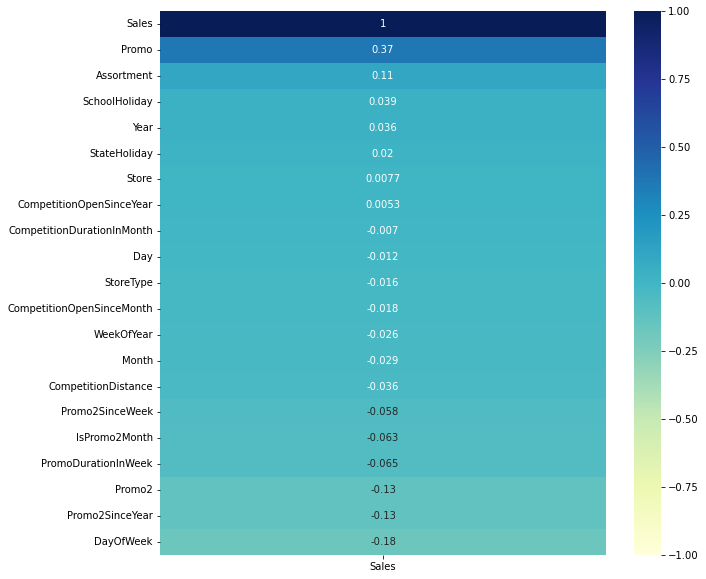

In [76]:
# correlation matrix for numerical variables and the target variable
fig, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(train_store_open_sales_gt_0.corr()[['Sales']].sort_values('Sales'), vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()
plt.show()


# Multivariate Analysis

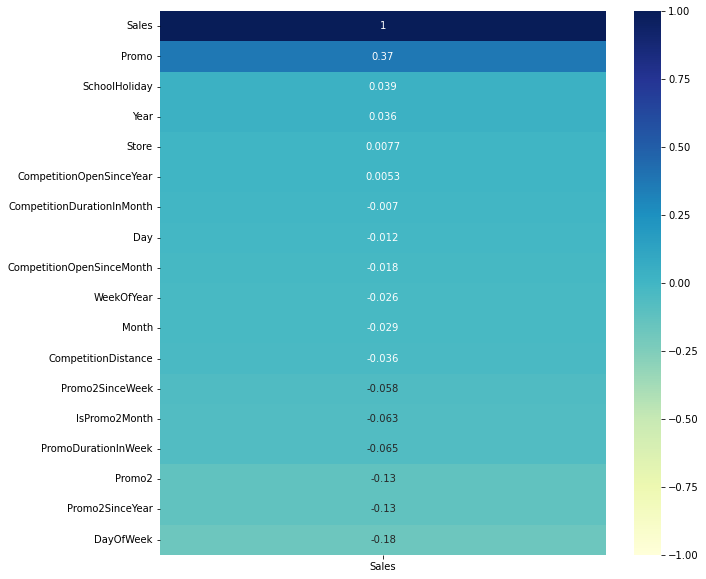

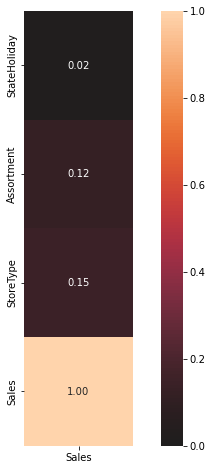

In [21]:
# correlation matrix for numerical variables and the target variable
fig, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(train_store_open_sales_gt_0.corr()[['Sales']].sort_values('Sales'), vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()
plt.show()

# correlation matrix for categorical variables and the target variable
#!pip install dython
from dython import nominal
nominal.associations(train_store_open_sales_gt_0[['StateHoliday','Assortment', 'StoreType', 'Sales']], nominal_columns=['StateHoliday','Assortment', 'StoreType'], display_columns=['Sales'], figsize=(10,8))
plt.show()

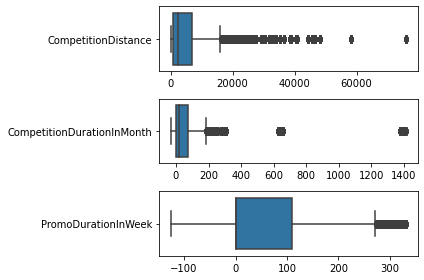

In [22]:
# checking for outliers in numeric features

plt.subplot(3, 1, 1)
sb.boxplot(orient = 'h', data = train_store_open_sales_gt_0[['CompetitionDistance']])
plt.subplot(3, 1, 2)
sb.boxplot(orient = 'h', data = train_store_open_sales_gt_0[['CompetitionDurationInMonth']])
plt.subplot(3, 1, 3)
sb.boxplot(orient = 'h', data = train_store_open_sales_gt_0[['PromoDurationInWeek']])
plt.tight_layout()
plt.show()

In [23]:
train_store_open_sales_gt_0.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'WeekOfYear', 'CompetitionDurationInMonth',
       'PromoDurationInWeek', 'IsPromo2Month'],
      dtype='object')

# data prep

In [24]:
# encode categorical data
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
train_store_open_sales_gt_0.StoreType.replace(mappings, inplace=True)
train_store_open_sales_gt_0.Assortment.replace(mappings, inplace=True)
train_store_open_sales_gt_0.StateHoliday.replace(mappings, inplace=True)

test_store_open.StoreType.replace(mappings, inplace=True)
test_store_open.Assortment.replace(mappings, inplace=True)
test_store_open.StateHoliday.replace(mappings, inplace=True)

# dropping promo interval and date from the dataset, instead using the new created feature : isPromo2Month
train_store_open_sales_gt_0.drop(columns=["PromoInterval", "Date"], inplace=True)
test_store_open.drop(columns=["PromoInterval", "Date"], inplace=True)


In [25]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

rs = RobustScaler()  
ms = MinMaxScaler() # sensitive to outliers, robust scaler works better in that case

# normalizing the numerical features
def normalize_data(df):
    df1 = df.drop(columns=["CompetitionDurationInMonth", "CompetitionDistance"])
    columns = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
               'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day','WeekOfYear', 'PromoDurationInWeek', 'IsPromo2Month']
    df1[columns] = ms.fit_transform( df1[columns].values )
    df1['CompetitionDistance'] = rs.fit_transform( df[['CompetitionDistance']].values ) 
    df1['CompetitionDurationInMonth'] = rs.fit_transform( df[['CompetitionDurationInMonth']].values)
    
    return df1

train_data_final = normalize_data(train_store_open_sales_gt_0)
test_data_final = normalize_data(test_store_open)

X = train_data_final.drop("Sales", ", axis=1)
y = train_data_final["Sales"]

In [26]:
X.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,PromoDurationInWeek,IsPromo2Month,CompetitionDistance,CompetitionDurationInMonth
1017190,0.983842,0.166667,0.0,0.333333,1.0,0.333333,0.5,0.250000,0.993548,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.275711,0.0,-0.260940,1.540541
1016179,0.075404,0.166667,0.0,0.333333,1.0,0.333333,0.0,0.833333,0.998015,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.275711,0.0,-0.074554,-0.027027
1016353,0.231598,0.166667,0.0,0.333333,1.0,0.333333,0.5,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.275711,0.0,-0.343598,-0.229730
1016356,0.234291,0.166667,0.0,0.333333,1.0,0.333333,0.0,0.416667,0.999007,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.275711,0.0,-0.186386,-0.283784
1016368,0.245063,0.166667,0.0,0.333333,1.0,0.333333,0.5,0.000000,0.000000,1.0,0.2,0.999007,0.0,0.0,0.0,0.0,0.256018,1.0,0.212318,-0.229730


In [27]:
test_data_final.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,PromoDurationInWeek,IsPromo2Month,CompetitionDistance,CompetitionDurationInMonth
0,0.000000,0.5,NaN,1.0,0.0,0.0,0.666667,0.0,0.750000,0.996526,...,0.000000,0.000000,0.0,0.727273,0.391304,0.75,0.059490,0.0,-0.204467,0.716049
1,0.001795,0.5,NaN,1.0,0.0,0.0,0.000000,0.0,1.000000,0.995533,...,0.285714,0.998015,0.0,0.727273,0.391304,0.75,0.716714,0.0,2.005155,0.987654
2,0.005386,0.5,NaN,1.0,0.0,0.0,0.000000,1.0,0.333333,0.999007,...,0.000000,0.000000,0.0,0.727273,0.391304,0.75,0.059490,0.0,3.701031,0.024691
3,0.006284,0.5,NaN,1.0,0.0,0.0,0.000000,0.0,0.833333,0.999504,...,0.000000,0.000000,0.0,0.727273,0.391304,0.75,0.059490,0.0,0.869416,-0.197531
4,0.007181,0.5,NaN,1.0,0.0,0.0,0.000000,1.0,0.666667,0.992556,...,0.000000,0.000000,0.0,0.727273,0.391304,0.75,0.059490,0.0,-0.073883,1.938272


In [30]:
def calculate_rmspe(y_pred, y_actual):
    return np.sqrt(np.mean(((y_actual-y_pred)/y_actual)**2))

In [79]:
# split data into training and validation set

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

ts = TimeSeriesSplit(n_splits=10)
print(ts)

rmspe_values = []

for train_index, validation_index in ts.split(X):
    print("TRAIN : ", train_index, "VALIDATION : ", validation_index) 
    X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
    y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]
    # # Model
    # lr = LinearRegression().fit(X_train, y_train)
    # # Prediction 
    # y_pred = lr.predict(X_validation)
    
    # model
    rf = RandomForestRegressor( n_estimators = 100, n_jobs =-1, random_state=7 ).fit( X_train, y_train )

    # prediction
    y_pred = rf.predict(X_validation )

    # # performance
    # rf_result = ml_error( 'Random Forest Regressor', np.expm1( y_test ), np.expm1( yhat_rf ) )
    # rf_result
    
    # rmspe
    rmspe_values.append(calculate_rmspe(y_pred, y_validation.values))
    
print("Final model RMSPE value = ", np.mean(rmspe_values))
    

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None)
TRAIN :  [    0     1     2 ... 76755 76756 76757] VALIDATION :  [ 76758  76759  76760 ... 153513 153514 153515]
TRAIN :  [     0      1      2 ... 153513 153514 153515] VALIDATION :  [153516 153517 153518 ... 230271 230272 230273]
TRAIN :  [     0      1      2 ... 230271 230272 230273] VALIDATION :  [230274 230275 230276 ... 307029 307030 307031]
TRAIN :  [     0      1      2 ... 307029 307030 307031] VALIDATION :  [307032 307033 307034 ... 383787 383788 383789]
TRAIN :  [     0      1      2 ... 383787 383788 383789] VALIDATION :  [383790 383791 383792 ... 460545 460546 460547]
TRAIN :  [     0      1      2 ... 460545 460546 460547] VALIDATION :  [460548 460549 460550 ... 537303 537304 537305]
TRAIN :  [     0      1      2 ... 537303 537304 537305] VALIDATION :  [537306 537307 537308 ... 614061 614062 614063]
TRAIN :  [     0      1      2 ... 614061 614062 614063] VALIDATION :  [614064 614065 614066 ... 690

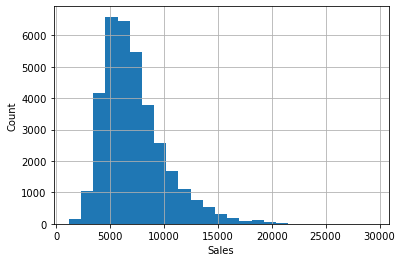

In [80]:
y_pred_test = rf.predict(test_data_final.drop("Sales", axis=1))
test_data_final["Sales"] = y_pred_test
test_data_final["Sales"].hist(bins = 25)
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

<AxesSubplot:>

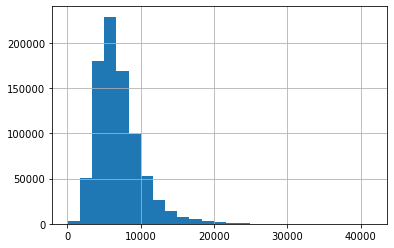

In [70]:
train_data_final["Sales"].hist(bins = 25)